<a href="https://colab.research.google.com/github/manzajmm/Entregas/blob/main/Primer_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CREDIT LADER INTERNATIONAL***

# ***INTRODUCCIÓN***

Somos una empresa financiera que se dedica a otorgar créditos. Nuestra función es analizar el perfil del cliente, es decir, si cumple con los requisitos para recibir un crédito en base a sus caracterísiticas, las cuales desarrollaremos más adelante.

Credit Lader International está conformada por:

-Leandro Sueldo

-Sabrina Benvenuto

-Juan Martin Manzanares

-Luca Robledo

CLI nació a raíz de la pandemia del 2020 para brindar sustento a aquellas personas cuyos ingresos disminuyeron debido al aislamiento o se encontraron desempleados, por lo cual optaron por solicitar un préstamo a nuestra compañía

# ***MODELO DATA SCIENCE***

Nuestro problema de negocio es identificar mediante la ejecución de un algoritmo si las personas solicitantes al crédito aplican o no al mismo según ciertos criterios. 

# ***DATA ACQUISITION***

La fuente original que utilizamos para el análisis lo obtuvimos a través de la página Kaggle. Podrá visualizarse por medio del siguiente link: https://docs.google.com/spreadsheets/d/1ozZ9RczhqHwxfolAMCTCmgC2Ft6QCsUu/edit?usp=sharing&ouid=108211289058967970465&rtpof=true&sd=true Es necesario aclarar que la misma fue modificada a lo largo del trabajo para facilitar nuestro análisis y amoldarla a nuestro objetivo.

Los variables que incluiremos en nuestro análisis son las siguientes:

*   CODE_GENDER = Género.
*   FLAG_OWN_CAR = Posee o no autómovil.
*   FLAG_OWN_REALTY = Posee o no propiedades.
*   CNT_CHILDREN = Cantidad de hijos.
*   AMT_INCOME_TOTAL = Ingresos anuales.
*   NAME_INCOME_TYPE = Tipo de ingreso.
*   NAME_EDUCATION_TYPE = Nivel de educación.
*   NAME_FAMILY_STATUS = Estado civil.
*   NAME_HOUSING_TYPE = Dónde vive.
*   DAYS_BIRTH = Cumpleaños. Cuenta hacia atrás desde el día actual (0), -1 significa ayer
*   DAYS_EMPLOYED = Días desde los que fue contratado. Cuenta hacia atrás desde el día actual (0). Si es positivo, significa que la persona actualmente está desempleada.
*   FLAG_MOBIL = Posee o no teléfono celular.
*   FLAG_WORK_PHONE = Posee o no teléfono laboral.
*   FLAG_PHONE = Posee o no teléfono.
*   FLAG_EMAIL = Posee o no e-mail.
*   OCCUPATION_TYPE = Ocupación.
*   CNT_FAM_MEMBERS = Tamaño de la familia.
*   STATUS = Estado de pago del crédito (0: pagó en término, 1: adeuda cuota)

Los datos anteriormente mencionados fueron recopilados a través de diferentes entrevistas realizadas a las personas que solicitaron el crédito. Consideramos que son relevantes para nuestro análisis porque nos permite identificar aquellos usuarios beneficiosos, cumplidores y de interés para CLI.

# ***DATA WRANGLING / EDA***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_record.csv to credit_record.csv
Saving scoring.csv to scoring.csv


In [ ]:
df1 = pd.read_csv("scoring.csv", sep=';')
df2 = pd.read_csv("credit_record.csv", sep=';',index_col=0)

***Observamos los primeros diez registros del dataset.***

In [ ]:
df1.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


**Conocemos los nombres de cada columna.**

In [ ]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

***Buscamos entender los distintos tipos de datos almacenados en el dataset y por columna.***

In [ ]:
df1.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

***Con shape, conocemos el tamaño de nuestro conjunto de datos.***

In [ ]:
df1.shape

(438557, 18)

***Cercioramos estar trabajando con un pandas DataFrame.***

In [ ]:
type(df1)

pandas.core.frame.DataFrame

***Observamos la cantidad de registros por variable. Notamos un faltante de datos en la columna OCCUPATION_TYPE.***

In [ ]:
df1.count()

ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64

***Confirmamos la ausencia de datos con la funcion info.***

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Usamos una interfaz gráfica para detectar y elegir la columna a desechar por falta de datos

> Bloque con sangría



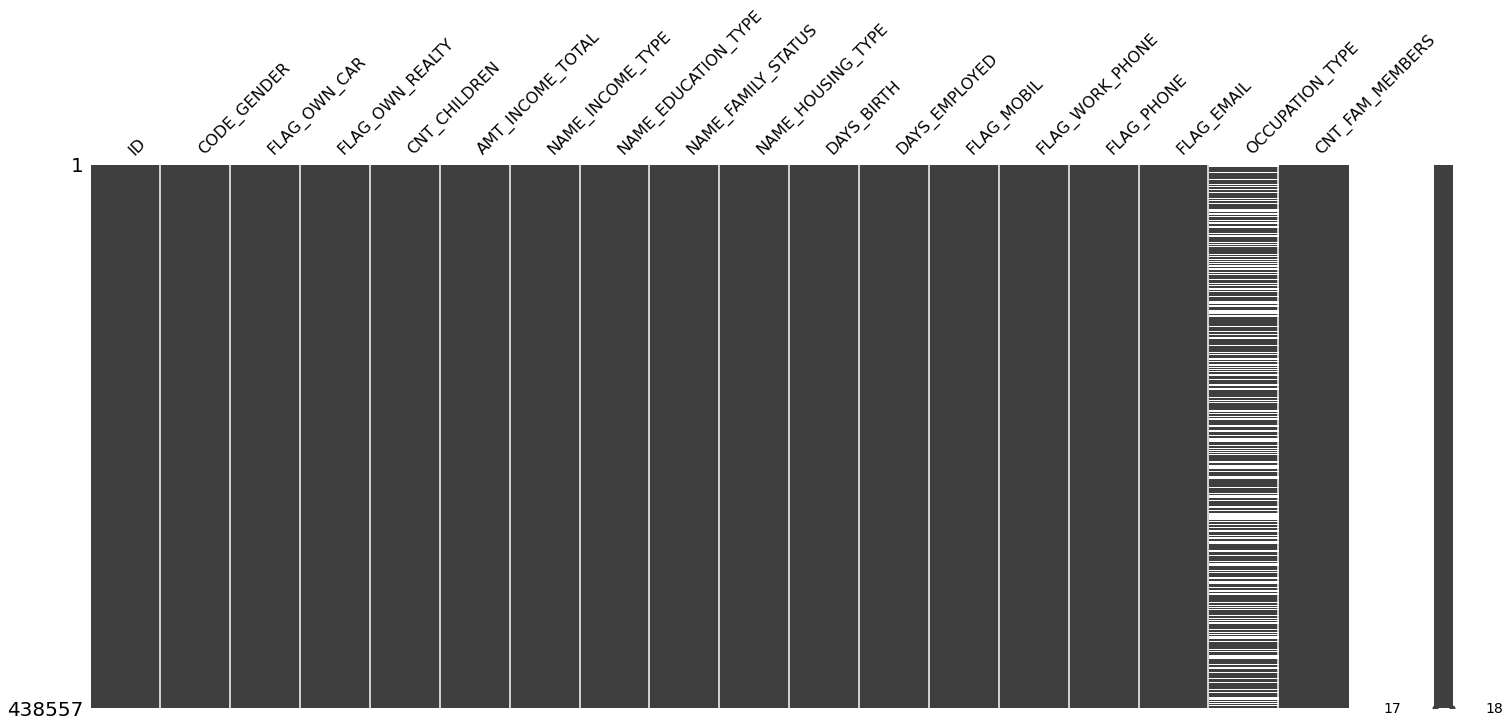

In [ ]:
import missingno as msno

msno.matrix(df1)

***A continuacion decidimos seguir adelante sin la columna OCCUPATION_TYPE en nuestro dataset.***

In [ ]:
df1 = df1.drop(['OCCUPATION_TYPE'], axis=1)
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0


***Usamos la funcion describe, para poder obervar los datos estadisticos de las variables numericas***

In [ ]:
df1['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df1['NAME_INCOME_TYPE'].describe()

count      438557
unique          5
top       Working
freq       226104
Name: NAME_INCOME_TYPE, dtype: object

In [ ]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

***Analizamos el DataFrame2***

In [ ]:
df2.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
df2.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [ ]:
df2.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
df2.count()

ID                1048575
MONTHS_BALANCE    1048575
STATUS            1048575
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


Usamos describe sobre el 'STATUS' para describir cuántas categorías tenemos de forma única

In [ ]:
df2['STATUS'].describe()

count     1048575
unique          8
top             C
freq       442031
Name: STATUS, dtype: object

Ahora pasaremos a observar cuantos valoers únicos hay en cada categoría

In [ ]:
df2['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

***Unimos ambos DataFrames según ID***

In [ ]:
merge1=df1.merge(df2, on=['ID'],how='inner')
merge1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0


Usamos una interfaz gráfica para comprobar la integridad del dataset creado

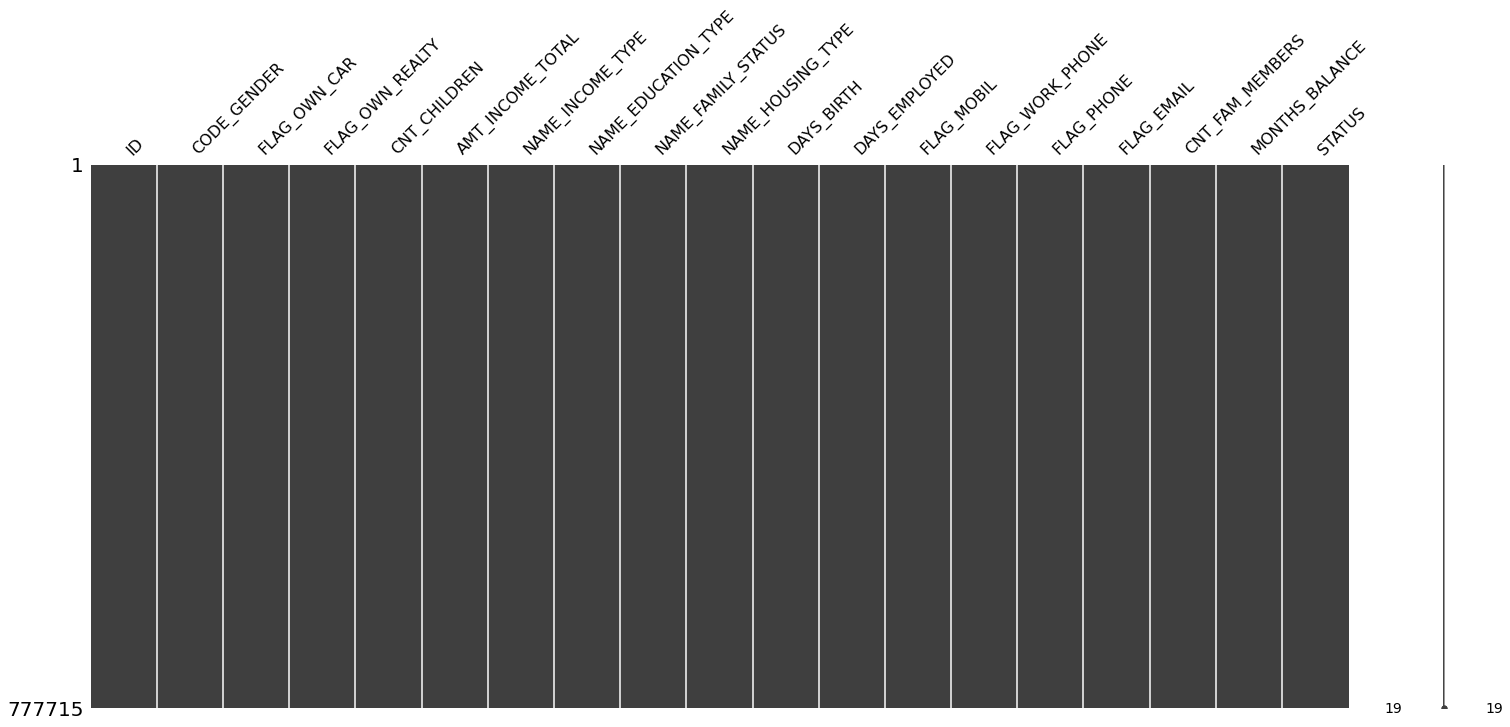

In [ ]:
msno.matrix(merge1)

***Vamos a analizar cuantos datos terminan estando en ambos Dataframes (descartamos aquellos cuyo id no esta en ambas tablas por no tener valores coincidentes)***

In [ ]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
merge1.shape

(777715, 19)

# ***ANÁLISIS UNIVARIADO***

***Con el siguiente grafico de barras notamos claramente una mayor cantidad de clientes cuyo ingreso proviene de un trabajo en relacion de dependencia.***

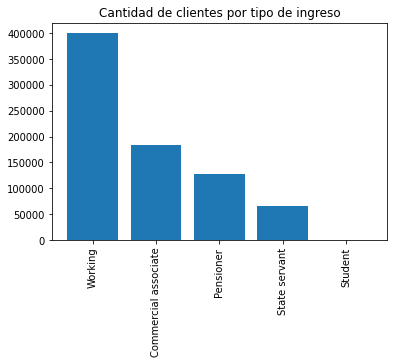

In [ ]:
eje_x = merge1['NAME_INCOME_TYPE'].unique()
eje_y = merge1['NAME_INCOME_TYPE'].value_counts()

plt.bar(eje_x, eje_y)

plt.title('Cantidad de clientes por tipo de ingreso')
plt.xticks(rotation=90)
plt.show()

***Procedemos a calcular las frecuencias absolutas y relativas, como asi tambien sus valores acumulados.***

In [ ]:
freq_abs = pd.Series(merge1['NAME_INCOME_TYPE']).value_counts()
rel_freq = freq_abs / len(df1['NAME_INCOME_TYPE'])
df = pd.concat([freq_abs, rel_freq], axis=1)
df.columns = ['freq_absoluta', 'freq_relativa']
df

,freq_absoluta,freq_relativa
Working,400164,0.912456
Commercial associate,183385,0.418155
Pensioner,128392,0.292760
State servant,65437,0.149210
Student,337,0.000768


In [ ]:
abs_freq_val = freq_abs.values

count = 0
abs_acum = []
for e in abs_freq_val:
  count = count + e
  abs_acum.append(count)

df['freq_abs_acum'] = abs_acum
df

,freq_absoluta,freq_relativa,freq_abs_acum
Working,400164,0.912456,400164
Commercial associate,183385,0.418155,583549
Pensioner,128392,0.292760,711941
State servant,65437,0.149210,777378
Student,337,0.000768,777715


In [ ]:
rel_freq_val = df['freq_relativa'].values
count = 0
rel_acum = []
for e in rel_freq_val:
  count = count + e
  rel_acum.append(count)

df['freq_rel_acum'] = rel_acum
df = df[['freq_absoluta','freq_abs_acum','freq_relativa','freq_rel_acum']]


***Observando la tabla vemos que mas del cincuenta por ciento de los clientes trabajan en relacion de dependencia.***

In [ ]:
df

,freq_absoluta,freq_abs_acum,freq_relativa,freq_rel_acum
Working,400164,400164,0.912456,0.912456
Commercial associate,183385,583549,0.418155,1.330612
Pensioner,128392,711941,0.292760,1.623372
State servant,65437,777378,0.149210,1.772581
Student,337,777715,0.000768,1.773350


***Con este grafico podemos darnos cuenta que la cantidad de clientes de sexo femenino es mayor.***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


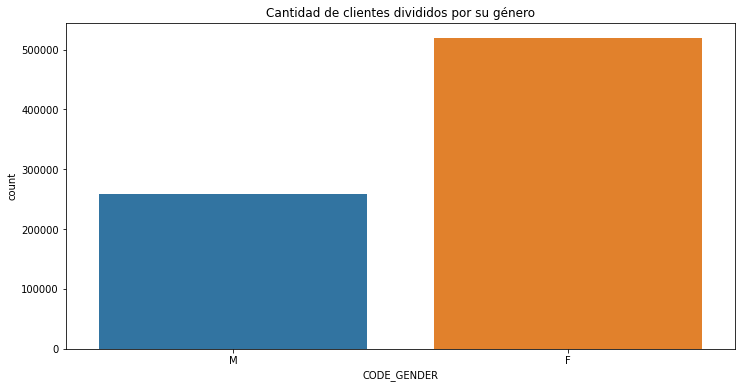

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cantidad de clientes divididos por su género')
sns.countplot(merge1.CODE_GENDER)

***Calculamos cuantos desempleados hay***

In [ ]:
df3 = merge1.apply(lambda x: x['DAYS_EMPLOYED'] > 0, axis=1).sum()
df3

127972

In [ ]:
Desempleados = round((df3 * 100) / len(df1['DAYS_EMPLOYED']))
Desempleados

29

***Graficamos la cantidad de clientes que poseen propiedades y los que no***

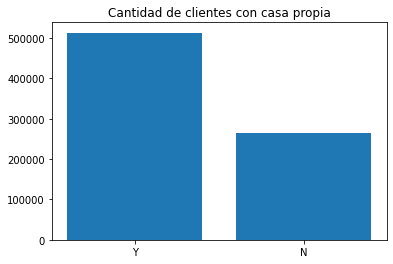

In [ ]:
x_values = merge1['FLAG_OWN_REALTY'].unique()
y_values = merge1['FLAG_OWN_REALTY'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.title('Cantidad de clientes con casa propia')
plt.show()
plt.close('all')

# ***ANÁLISIS BIVARIADO***

***En el siguiente gráfico buscamos conocer la relación existente entre el tipo de ocupación de las personas que solicitan el crédito con su nivel de ingreso.*** 

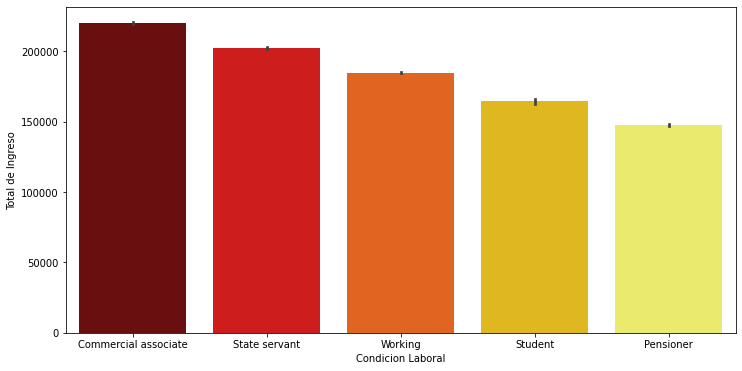

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x ='NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', data= merge1 ,palette='hot', order =['Commercial associate','State servant','Working','Student','Pensioner'])
plt.ylabel('Total de Ingreso')
plt.xlabel('Condicion Laboral')
plt.show()

***Observamos que los que se desempeñan como "Commercial Associate" tienen el mayor nivel de ingreso.***

***Por otro lado, queremos conocer la relación entre el sexo de la persona y su nivel de ingreso.***

Text(0.5, 0, 'Genero')

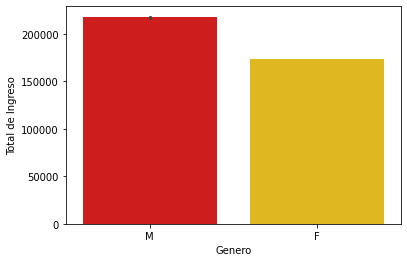

In [ ]:

sns.barplot(x='CODE_GENDER', y= 'AMT_INCOME_TOTAL', data = merge1, palette='hot')
plt.ylabel('Total de Ingreso')
plt.xlabel('Genero')

***Según el gráfico, concluimos que el género masculino tiene un nivel de ingreso mayor que el femenino.***

***Graficamos las medidas de tendencia central de los distintos tipos de ocupaciones con los niveles de ingreso.***

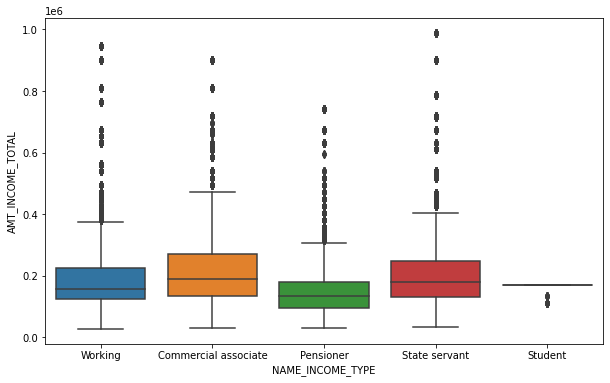

In [ ]:
plt.figure(figsize=(10,6))
amt_2 = merge1['AMT_INCOME_TOTAL'] < 1000000
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", data=merge1[amt_2])
plt.show()

***Queremos observar la relación existente entre el estado civil y el nivel de ingreso.***

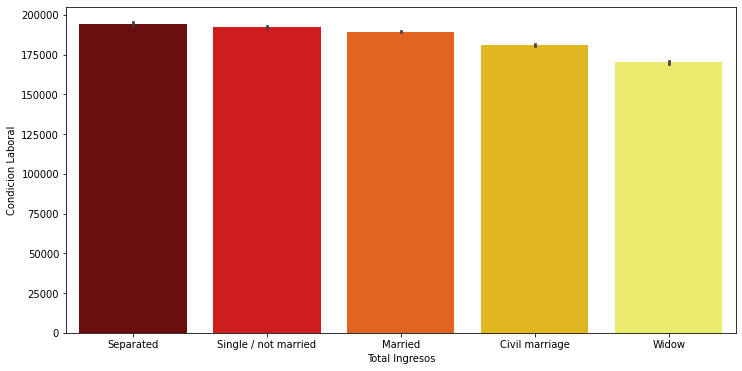

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x ='NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL', data= merge1, palette='hot',order =['Separated','Single / not married','Married','Civil marriage','Widow'])
plt.ylabel('Condicion Laboral')
plt.xlabel('Total Ingresos')
plt.show()

***Visualizamos que a rasgo general las personas con distintos estados civiles tienen un nivel de ingreso bastante similar.***

***Por último, nos interesa conocer el efecto que produce el nivel de estudio alcanzado con el ingreso.***

Text(0.5, 0, 'Nivel Educativo')

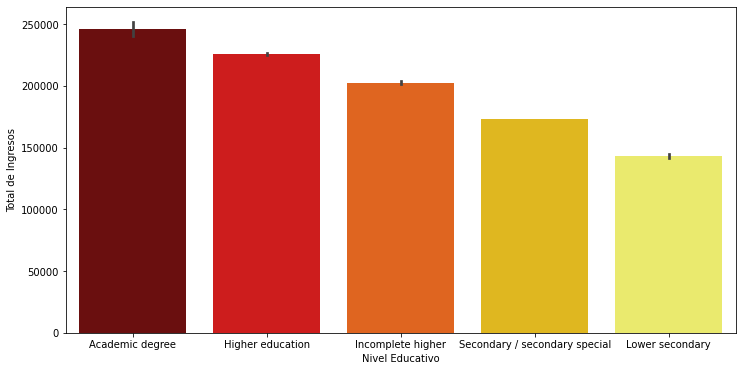

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', data = merge1,palette='hot', order =['Academic degree','Higher education','Incomplete higher','Secondary / secondary special','Lower secondary'])
plt.ylabel('Total de Ingresos')
plt.xlabel('Nivel Educativo')

***Como es de esperar, las personas con un título académico tienen mayor nivel de ingreso. En contraposición, los solicitantes al 
crédito con secundario incompleto, son los que poseen menor ingeso.***

# ***ANÁLISIS MULTIVARIADO***

***Analizamos el nivel de educacion alcanzado respecto al ingreso total y separamos en genero. Los hombres tienen mayores ingresos en todos los niveles académicos***

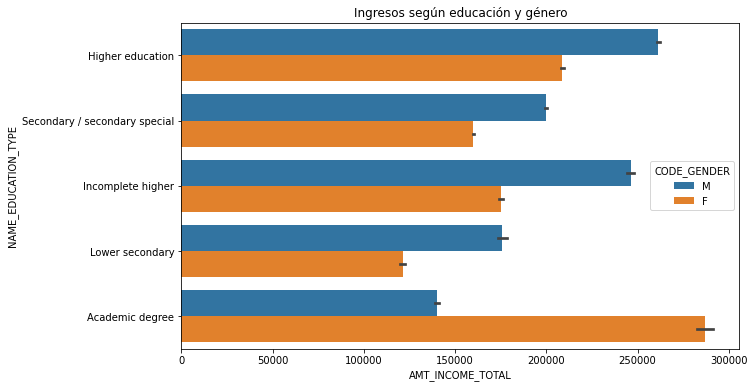

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Ingresos según educación y género')
sns.barplot(x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=merge1)
plt.show()

***En este caso, al comparar el nivel de educacion con el ingreso total y la posesion de bienes raices, nos damos cuenta que la mayoria de los clientes poseen al menos una propiedad.***

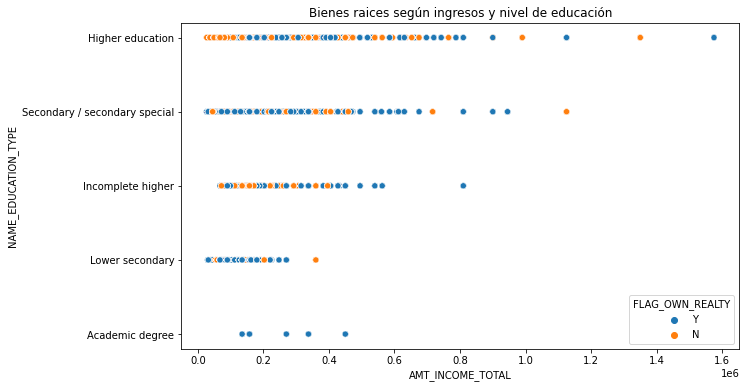

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Bienes raices según ingresos y nivel de educación')
sns.scatterplot(x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE',hue='FLAG_OWN_REALTY',data=merge1)
plt.show()

***Analizamos y comparamos los tipos de ingreso por género***

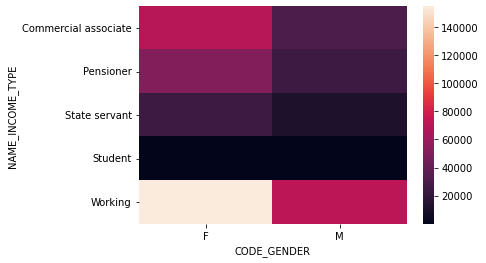

In [ ]:
sns.heatmap(pd.crosstab(df1['NAME_INCOME_TYPE'],merge1['CODE_GENDER']))
plt.show()

***Con el siguiente grafico, notamos un mayor numero de clientes de genero femenino.***

Text(0.5, 0.98, 'Cantidad de clientes discriminado por género, ingresos y educacion')

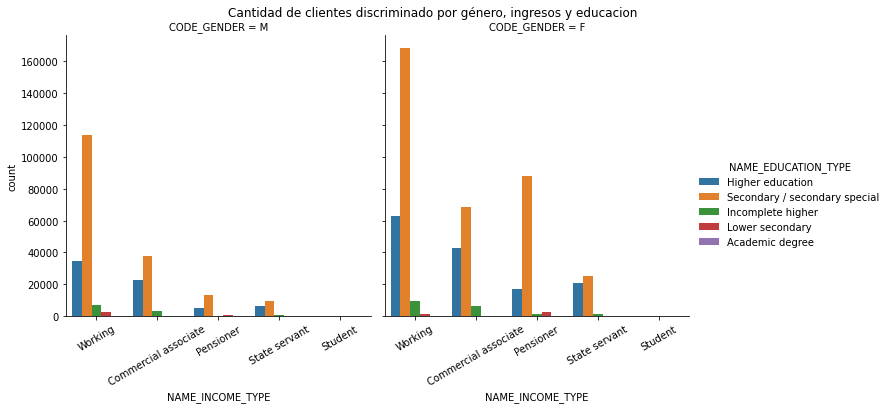

In [ ]:
g = sns.catplot(x="NAME_INCOME_TYPE", hue="NAME_EDUCATION_TYPE", col="CODE_GENDER",
                data=merge1, kind="count");
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Cantidad de clientes discriminado por género, ingresos y educacion')

# ***DATASET FINAL***

In [ ]:
merge1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
